In [7]:
import numpy as np
from photutils import datasets
hdu = datasets.load_star_image()  
image = hdu.data[500:700, 500:700].astype(float)

In [2]:
image -= np.median(image)

In [3]:
from photutils import DAOStarFinder
from astropy.stats import mad_std
bkg_sigma = mad_std(image)  
daofind = DAOStarFinder(fwhm=4., threshold=3.*bkg_sigma)  
sources = daofind(image)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)

 id xcentroid ycentroid  sharpness  ... sky peak    flux       mag    
--- --------- ---------- ---------- ... --- ---- --------- -----------
  1 182.83866 0.16767019 0.85099873 ...   0 3824 2.8028346  -1.1189937
  2 189.20431 0.26081353  0.7400477 ...   0 4913 3.8729185  -1.4700959
  3 5.7946491  2.6125424 0.39589731 ...   0 7752 4.1029107  -1.5327302
  4 36.847063  1.3220228 0.29594528 ...   0 8739 7.4315818  -2.1777032
  5 3.2565602   5.418952 0.35985495 ...   0 6935 3.8126298  -1.4530616
  6 10.268038  5.3999204 0.49375848 ...   0 8205 2.8472517  -1.1360646
  7 93.556424  7.3860242 0.50812587 ...   0 7440 7.0356171  -2.1182555
  8 5.7380557  7.5152239 0.44193256 ...   0 8500 2.7201818  -1.0864948
  9 19.136489   9.040662 0.68910946 ...   0 3691 2.7049518  -1.0803988
 10 55.052002  11.353116 0.43075296 ...   0 8115 2.9139911  -1.1612205
...       ...        ...        ... ... ...  ...       ...         ...
142 141.91145  181.03698 0.33807584 ...   0 8359 4.0809956  -1.5269153
143 17

In [4]:
from photutils import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=4.)  
phot_table = aperture_photometry(image, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

 id  xcenter   ycenter   aperture_sum
       pix       pix                 
--- --------- ---------- ------------
  1 182.83866 0.16767019    18121.759
  2 189.20431 0.26081353    29836.515
  3 5.7946491  2.6125424    331979.82
  4 36.847063  1.3220228    183705.09
  5 3.2565602   5.418952    349468.98
  6 10.268038  5.3999204    261533.37
  7 93.556424  7.3860242     66815.03
  8 5.7380557  7.5152239    363004.57
  9 19.136489   9.040662    49273.929
 10 55.052002  11.353116    380132.88
...       ...        ...          ...
143 171.90254  183.06103    47904.419
144 77.248199  184.02735    54903.417
145 14.510474  185.86368    143839.37
146 153.55621  185.96483    142561.83
147 197.24864  186.16647    137269.81
148 124.31327  188.30523    45084.874
149 24.257207  194.71494    355778.01
150    116.45  195.05923    31232.912
151 18.958086  196.34207    162076.26
152 111.52575  195.73192    82795.715
Length = 152 rows


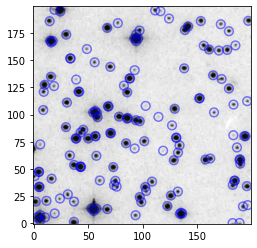

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray_r', origin='lower')
apertures.plot(color='blue', lw=1.5, alpha=0.5)